In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <a id='0'> Data Wrangling Examples

- <a href='#1'> USA.gov Data from Bitly
- <a href='#2'> MovieLens 1M Dataset
- <a href='#3'> US Baby Names 1880-2010
- <a href='#4'> USDA Food Database
- <a href='#5'> 2012 Federal Election Commision Database

## <a id='1'>USA.gov Data from Bitly

In [2]:
# each line is a dict
!wc   -l  datasets/bitly_usagov/example.txt
!head -n1 datasets/bitly_usagov/example.txt
!tail -n1 datasets/bitly_usagov/example.txt

    3560 datasets/bitly_usagov/example.txt
{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }
{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; MS-RTC LM 8; .NET4.0C; .NET4.0E; .NET CLR 1.1.4322)", "c": "US", "nk": 0, "tz": "America\/New_York", "gr": "VA", "g": "qxKrTK", "h": "qxKrTK", "l": "bitly", "al": "en-US", "hh": "1.usa.gov", "r": "http:\/\/t.co\/OEEEvwjU", "u": "http:\/\/herndon-va.gov\/Content\/public_safety\/Public_Information\/weekly_reports.asp

In [9]:
file = 'datasets/bitly_usagov/example.txt'

with open(file) as fh:
    records = fh.readlines()
    
print(len(records))
print(type(records))
print(type(records[0]), records[0])

3560
<class 'list'>
<class 'str'> { "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [18]:
# Python.json.loads #io

import json
file = 'datasets/bitly_usagov/example.txt'

# loads: load str
records = [ json.loads(line) for line in open(file)]  # list of dicts
type(records), type(records[0])

(list, dict)

In [8]:
len(records), len(records[0].keys()), records[:2], records[0].keys(), records[-1].keys()

(3560,
 16,
 [{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
   'c': 'US',
   'nk': 1,
   'tz': 'America/New_York',
   'gr': 'MA',
   'g': 'A6qOVH',
   'h': 'wfLQtf',
   'l': 'orofrog',
   'al': 'en-US,en;q=0.8',
   'hh': '1.usa.gov',
   'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
   'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
   't': 1331923247,
   'hc': 1331822918,
   'cy': 'Danvers',
   'll': [42.576698, -70.954903]},
  {'a': 'GoogleMaps/RochesterNY',
   'c': 'US',
   'nk': 0,
   'tz': 'America/Denver',
   'gr': 'UT',
   'g': 'mwszkS',
   'h': 'mwszkS',
   'l': 'bitly',
   'hh': 'j.mp',
   'r': 'http://www.AwareMap.com/',
   'u': 'http://www.monroecounty.gov/etc/911/rss.php',
   't': 1331923249,
   'hc': 1308262393,
   'cy': 'Provo',
   'll': [40.218102, -111.613297]}],
 dict_keys(['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't', 'hc', 'cy', 'll']),
 dict_keys(['a', 'c

In [20]:
# use pd.read_json instead of (json.loads + conversion to DF)

file = 'datasets/bitly_usagov/example.txt'
df = pd.read_json(file, lines=True)
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [21]:
df.columns

Index(['_heartbeat_', 'a', 'al', 'c', 'cy', 'g', 'gr', 'h', 'hc', 'hh', 'kw',
       'l', 'll', 'nk', 'r', 't', 'tz', 'u'],
      dtype='object')

### Python: Counting Time Zones

In [ ]:
#extract timezone info. from a json file (list of dicts)

In [14]:
# Store them in a list using List Comprehension
# check if a key exists in a dict: key in dict() #search

# 1. extract time zones from records
time_zones = [rec['tz'] for rec in records if 'tz' in rec]  # handle missing key in some rec

# 2. use Counter from collections to get the top5 most common time zones
from collections import Counter

tz_counts = Counter(time_zones)
tz_counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Pandas: Counting Time Zones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

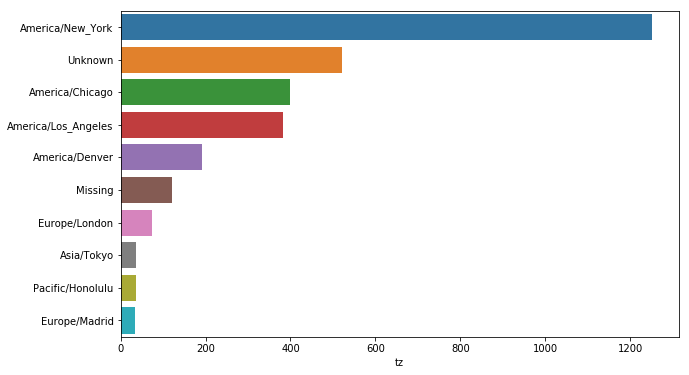

In [28]:
# Naturally convert list of dicts into a DF
records = [json.loads(line) for line in open(file)]
records_df = pd.DataFrame(records)
records_df.info()
records_df.head(3)

# Set missing/empty timezones to 'Unknown'
records_df.loc[records_df['tz'].isna(), 'tz'] = 'Missing'
records_df.loc[records_df['tz'] == '',  'tz'] = 'Unknown'
top_tz = records_df['tz'].value_counts()[:10]
display(top_tz)
sns.barplot(y=top_tz.index, x=top_tz)

#### Q: What to do if it's Big Data?

In [31]:
# read a large file in batch, count wanted values and record the result #big
# Tools: pd.read_json, Series.add, Series.sort_values,
# chunksize

chunks = pd.read_json(file, chunksize=100, lines=True)  # create a generator
tmp_tz_counts = pd.Series()

for sub_df in chunks:
    sub_df.loc[sub_df['tz'].isna(), 'tz'] = 'Missing'
    sub_df.loc[sub_df['tz'] == '',  'tz'] = 'Unknown'
    tmp_tz_counts = tmp_tz_counts.add(sub_df['tz'].value_counts(), fill_value=0 )

tmp_tz_counts = tmp_tz_counts.sort_values(ascending=False)
tmp_tz_counts.head(10)

America/New_York       1251.0
Unknown                 521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Missing                 120.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
dtype: float64

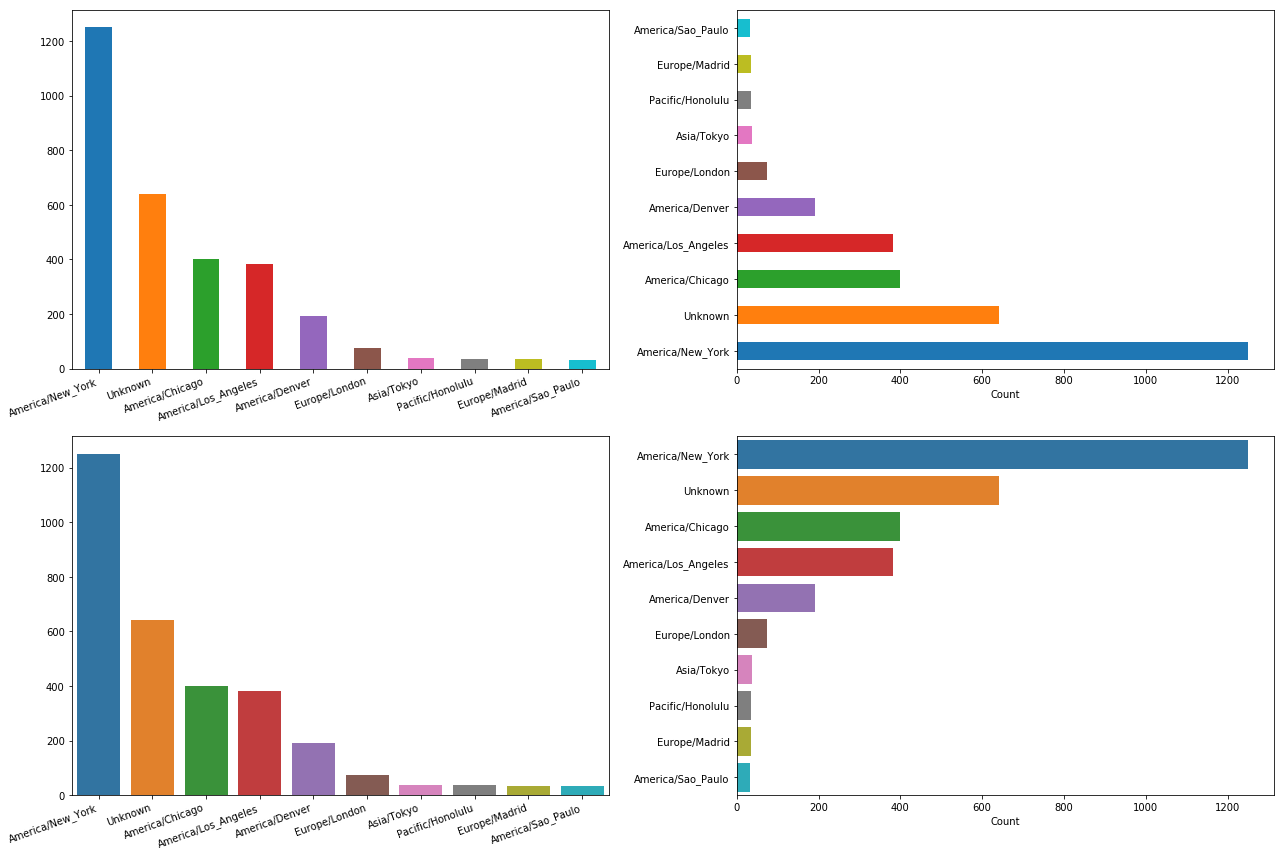

In [22]:
## Top timezone counts
#plot
# Bar plot: Pandas vs Seaborn

# Choose Pandas to do bar plot. Pandas is easier to use and to remember for me.

# Series.plot.bar(ax=), Series.plot.barh
# sns.barplot(x=,y=,ax=)

# Use matplotlib to handle nuisances like xticklabels
# ax[].set_xticklabels(labels, ha=, rotation=)

_, ax = plt.subplots(2,2,figsize=(18, 12))

tz_v_counts = records_df.tz.value_counts()

# Pandas
tz_v_counts[:10].plot.bar(ax=ax[0,0]);
ax[0,0].set_xticklabels(tz_v_counts[:10].index, ha='right', rotation=20)

tz_v_counts[:10].plot.barh(ax=ax[0,1]);
ax[0,1].set_xlabel('Count')

# Seaborn
sns.barplot(x=tz_v_counts[:10].index, y=tz_v_counts[:10].values, ax=ax[1,0]);
ax[1,0].set_xticklabels(tz_v_counts[:10].index, ha='right', rotation=20)

sns.barplot(y=tz_v_counts[:10].index, x=tz_v_counts[:10].values, ax=ax[1,1]);

plt.xlabel('Count');
plt.tight_layout();

#### The portion of Windows vs. Non-Windows users in the Top Time Zones
df['a'] shows the application that uses the service #compare

In [24]:
# List all records with a given OS
# How Pandas handle Search

os = 'windows'

# Series.str.contains() returns NA if value is NA  #search
# causing returned indices contain NA value, so must set na=False to avoid it

idx =  records_df['a'].str.contains(os, case=False, na=False) 

'{:.2f}'.format(len(records_df['a'][idx])/len(records_df))
records_df['a'][idx].head()

'0.63'

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
Name: a, dtype: object

In [27]:
## Transform col 'a' to col 'os', with conditional values  #condition #transform

# Way 1: Series.map(func)
# Way 2: np.where(idx_bool, v_true, v_false)

tz_os_df = records_df.copy()

# 1. Use Series.map()

def func(x):
    if 'windows' in str(x).lower():
        return 'Windows'
    else:
        return 'Not Windows'

#func = lambda x: 'Windows' if 'Windows' in x else 'Not Windows'
    
tz_os_df['os'] = tz_os_df['a'].map(func)
tz_os_df['os'].value_counts()

# 2. Use np.where
# np.where(condition, value_yes, value_no)

tz_os_df['os'] = np.where(
                tz_os_df['a'].str.contains('windows', case=False, na=False), #condition #search
                'Windows', 'Not Windows'
               )
tz_os_df['os'].value_counts()

tz_os_df=tz_os_df[['tz','os']]
tz_os_df.head()

Windows        2246
Not Windows    1314
Name: os, dtype: int64

Windows        2246
Not Windows    1314
Name: os, dtype: int64

,tz,os
0,America/New_York,Windows
1,America/Denver,Not Windows
2,America/New_York,Windows
3,America/Sao_Paulo,Not Windows
4,America/New_York,Windows


In [42]:
# Pandas bar plot #compare

idx_top_zones = tz_os_df.tz.value_counts().index[:10]

#equivalent
## groupby + agg + unstack
# "Not Windows" and 'Windows' need to be col names
os_unstacked_df = tz_os_df.groupby(['tz','os']).size().unstack().fillna(0)
os_unstacked_df.sort_values(by='Windows', ascending=False).head()

## pivot_table
tz_os_df.pivot_table(index='tz', columns='os', aggfunc='size').dropna(how='any')\
.sort_values(by='Windows',ascending=False).head()

os,Not Windows,Windows
tz,,
America/New_York,339.0,912.0
America/Chicago,115.0,285.0
Unknown,365.0,276.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0


os,Not Windows,Windows
tz,,
America/New_York,339.0,912.0
America/Chicago,115.0,285.0
Unknown,365.0,276.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0


os,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0


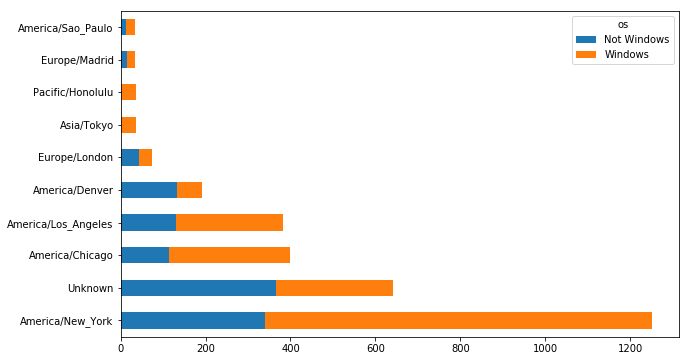

In [203]:
os_unstacked_df.head()

# .loc keeps the original order of the index array
os_unstacked_df.loc[idx_top_zones].plot.barh(stacked=True)

os,Not Windows,Windows
tz,,
America/New_York,0.270983,0.729017
Unknown,0.569423,0.430577
America/Chicago,0.287500,0.712500
America/Los_Angeles,0.340314,0.659686
America/Denver,0.691099,0.308901


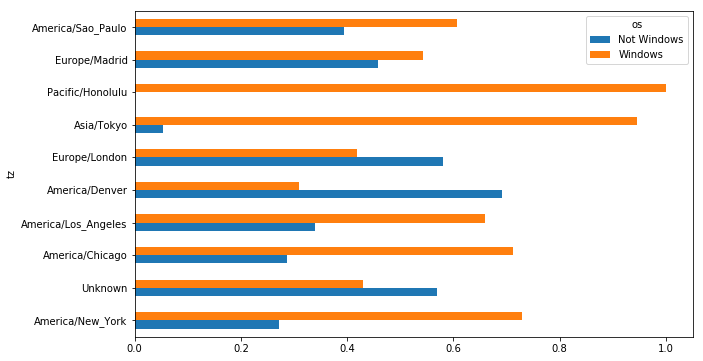

In [204]:
# normalized by total counts, saved in norm_df

top_tz_os_norm_df = os_unstacked_df.loc[idx_top_zones]
top_tz_os_norm_df.index.name = 'tz' # index name gone after .loc

sum_se = top_tz_os_norm_df.sum(1).copy()

top_tz_os_norm_df['Windows']     = top_tz_os_norm_df['Windows']    /sum_se
top_tz_os_norm_df['Not Windows'] = top_tz_os_norm_df['Not Windows']/sum_se
top_tz_os_norm_df.head()

top_tz_os_norm_df.plot.barh(stacked=False)

##  <a id='2'> MovieLens 1M Dataset
- <a href='#0'> Back to TOC

In [1]:
!wc    -l datasets/movielens/*
!head -n3 datasets/movielens/*

     159 datasets/movielens/README
    3883 datasets/movielens/movies.dat
 1000209 datasets/movielens/ratings.dat
    6040 datasets/movielens/users.dat
 1010291 total
==> datasets/movielens/README <==
SUMMARY


==> datasets/movielens/movies.dat <==
1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance

==> datasets/movielens/ratings.dat <==
1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968

==> datasets/movielens/users.dat <==
1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117


In [2]:
movies = pd.read_csv('datasets/movielens/movies.dat', 
                     sep='::', 
                     header=None, names=["MovieID","Title","Genres"],
                     )
movies.info()
movies.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


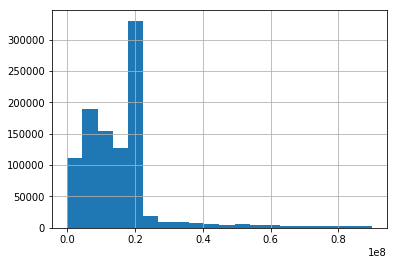

In [13]:
(ratings.Timestamp - ratings.Timestamp.min()).hist(bins=20)

In [29]:
ratings = pd.read_csv('datasets/movielens/ratings.dat', 
                     sep='::', 
                     header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])
# save memory
ratings['UserID']  = ratings['UserID'].astype(np.uint16)
ratings['MovieID'] = ratings['MovieID'].astype(np.uint16)
ratings['Rating']  = ratings['Rating'].astype(np.uint8)

ratings.info()
ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null uint16
MovieID      1000209 non-null uint16
Rating       1000209 non-null uint8
Timestamp    1000209 non-null int64
dtypes: int64(1), uint16(2), uint8(1)
memory usage: 12.4 MB


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [ ]:
np.boo

In [25]:
users['Gender'] = users['Gender'].astype(np.bool)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null uint16
Gender        6040 non-null bool
Age           6040 non-null uint8
Occupation    6040 non-null uint8
Zip-code      6040 non-null object
dtypes: bool(1), object(1), uint16(1), uint8(2)
memory usage: 76.8+ KB


In [26]:
users = pd.read_csv('datasets/movielens/users.dat', 
                     sep='::', 
                     header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
cols = ['Age', 'Occupation']

users['UserID']  = users['UserID'].astype(np.uint16)
users['Age']     = users['Age'].astype(np.uint8)
users['Occupation']  = users['Occupation'].astype(np.uint8)
users['Gender']      = np.where(users['Gender'] == 'F', True, False)
#users['Zip-code']  = users['Zip-code'].astype(np.uint32)

users.info()
users.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null uint16
Gender        6040 non-null bool
Age           6040 non-null uint8
Occupation    6040 non-null uint8
Zip-code      6040 non-null object
dtypes: bool(1), object(1), uint16(1), uint8(2)
memory usage: 76.8+ KB


,UserID,Gender,Age,Occupation,Zip-code
0,1,True,1,10,48067
1,2,False,56,16,70072
2,3,False,25,15,55117


### Most populated ratings

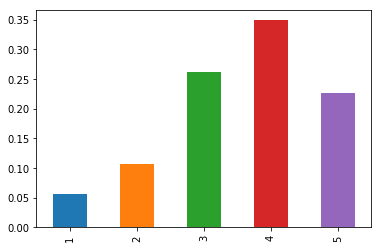

In [5]:
ratings['Rating'].value_counts(normalize=True,sort=False).plot.bar();

### Movies with most ratings

,Title,Genres,Counts
2858,American Beauty (1999),Comedy|Drama,3428
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,2991
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,2883
480,Jurassic Park (1993),Action|Adventure|Sci-Fi,2672
2028,Saving Private Ryan (1998),Action|Drama|War,2653
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,2649
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2590
1270,Back to the Future (1985),Comedy|Sci-Fi,2583
593,"Silence of the Lambs, The (1991)",Drama|Thriller,2578


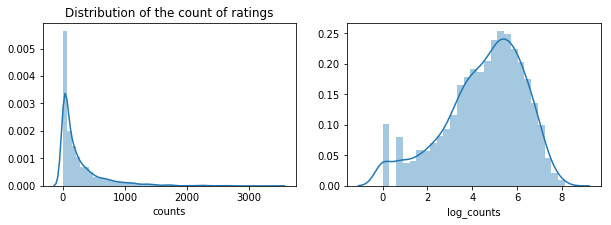

In [7]:
vote_counts = ratings['MovieID'].value_counts()
# display(vote_counts.describe())

_, ax = plt.subplots(1,2,figsize=(10,3))
sns.distplot(vote_counts,         axlabel='counts'    , ax=ax[0])
sns.distplot(np.log(vote_counts), axlabel='log_counts', ax=ax[1])
ax[0].set_title('Distribution of the count of ratings');

n_top = 10
top_IDs = ratings['MovieID'].value_counts()[:n_top].index
movies.set_index('MovieID').loc[top_IDs].join(vote_counts[:n_top].rename('Counts'))

### User information

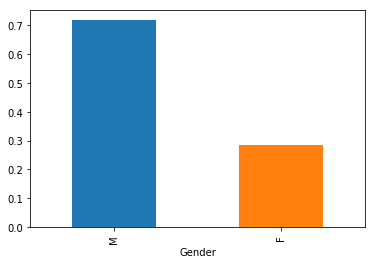

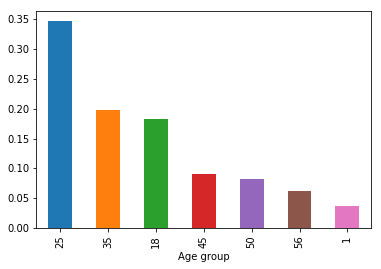

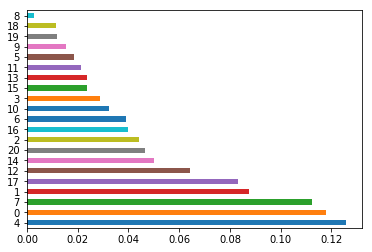

In [10]:
users['Gender'].value_counts(normalize=True).plot.bar();
plt.xlabel('Gender')
plt.figure()
users['Age'].value_counts(normalize=True).plot.bar();
plt.xlabel('Age group')
plt.figure()
users['Occupation'].value_counts(normalize=True).plot.barh();

### Top rated movies for each (Gender) group

In [32]:

ratings_users = pd.merge(ratings, users, on='UserID').drop('Zip-code', axis=1)
ratings_users.info()
ratings_users.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
UserID        1000209 non-null uint16
MovieID       1000209 non-null uint16
Rating        1000209 non-null uint8
Timestamp     1000209 non-null int64
Gender        1000209 non-null bool
Age           1000209 non-null uint8
Occupation    1000209 non-null uint8
dtypes: bool(1), int64(1), uint16(2), uint8(3)
memory usage: 22.9 MB


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation
0,1,1193,5,978300760,True,1,10
1,1,661,3,978302109,True,1,10
2,1,914,3,978301968,True,1,10


In [33]:
table = pd.pivot_table(ratings_users, values='Rating', index='MovieID', columns='Gender')
table.head()

Gender,False,True
MovieID,,
1,4.130552,4.187817
2,3.175238,3.278409
3,2.994152,3.073529
4,2.482353,2.976471
5,2.888298,3.212963


In [45]:
n_top=10
idx = table[True].sort_values(ascending=False)[:n_top].index
idx
movies.set_index('MovieID').loc[idx]

,Title,Genres
MovieID,,
1420,Message to Love: The Isle of Wight Festival (1...,Documentary
3888,Skipped Parts (2000),Drama|Romance
3292,"Big Combo, The (1955)",Film-Noir
3607,One Little Indian (1973),Comedy|Drama|Western
1780,Ayn Rand: A Sense of Life (1997),Documentary
1450,Prisoner of the Mountains (Kavkazsky Plennik) ...,War
687,Country Life (1994),Drama|Romance
681,Clean Slate (Coup de Torchon) (1981),Crime
3245,I Am Cuba (Soy Cuba/Ya Kuba) (1964),Drama


In [46]:
ratings_users.loc[ratings_users.MovieID==1420]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation
280668,1685,1420,2,974712842,False,35,12
295165,1753,1420,5,974704325,False,35,6
546423,3370,1420,5,967607781,False,18,4
589744,3598,1420,1,966627049,False,56,1
727996,4354,1420,5,966752748,False,35,14
760007,4516,1420,5,964856308,False,18,4
954708,5763,1420,5,959538056,True,25,1


In [34]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
movies['year'] = movies['title-year'].map(lambda s: s.split('(')[1].replace(')',''))
movies['year'].loc[movies['year'].str.isdigit()].value_counts().sort_index()
#movies.loc[movies['title-year'].str.contains('Yao a yao yao dao waipo qiao')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
id            3883 non-null int64
title-year    3883 non-null object
genre         3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


,id,title-year,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


1919      2
1920      2
1921      1
1922      1
1923      3
1925      5
1926      8
1927      6
1928      3
1929      3
1930      6
1931      6
1932      7
1933      7
1934      6
1935      6
1936      8
1937     10
1938      6
1939     11
       ... 
1981     39
1982     43
1983     35
1984     58
1985     62
1986     97
1987     67
1988     67
1989     56
1990     73
1991     55
1992     96
1993    152
1994    234
1995    321
1996    327
1997    298
1998    305
1999    265
2000    153
Name: year, Length: 81, dtype: int64

In [269]:
!cat datasets/movielens/README

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set, and must
       send us an electronic or paper copy of those publications.

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining 

In [5]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users   = pd.read_table('datasets/movielens/users.dat',   sep='::', engine='python',
                      header=None, names=unames)
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', engine='python',
                      header=None, names=rnames)
movies  = pd.read_table('datasets/movielens/movies.dat',  sep='::', engine='python',
                      header=None, names=mnames)

In [10]:
ratings.head()
movies.head()
users.head()
ratings.info()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [15]:
pd.merge(ratings, users).head()

data = pd.merge(pd.merge(ratings, users), movies)
data.info()
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [100]:
# mean ratings by gender


mean_ratings = data.pivot_table('rating', index='title', columns='gender')
# data.groupby(['title','gender'])['rating'].mean().unstack()  #equivalent as above

s = data.title.value_counts()
active_titles = s.index[ s>=250 ]  #occurrence

mean_ratings = mean_ratings.loc[active_titles].join(movies.drop('movie_id',axis=1).set_index('title'))
mean_ratings['genre_counts'] = mean_ratings.genres.str.count('\|')
mean_ratings

,F,M,genres,genre_counts
American Beauty (1999),4.238901,4.347301,Comedy|Drama,1
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,Action|Adventure|Fantasy|Sci-Fi,3
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,Action|Adventure|Drama|Sci-Fi|War,4
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,Action|Adventure|Romance|Sci-Fi|War,4
Jurassic Park (1993),3.579407,3.814197,Action|Adventure|Sci-Fi,2
Saving Private Ryan (1998),4.114783,4.398941,Action|Drama|War,2
Terminator 2: Judgment Day (1991),3.785088,4.115367,Action|Sci-Fi|Thriller,2
"Matrix, The (1999)",4.128405,4.362235,Action|Sci-Fi|Thriller,2
Back to the Future (1985),3.932707,4.009259,Comedy|Sci-Fi,1
"Silence of the Lambs, The (1991)",4.271955,4.381944,Drama|Thriller,1


In [43]:
# top female ratings
mean_ratings.sort_values(by='F', ascending=False)[:10]

# top male ratings
mean_ratings.sort_values(by='M', ascending=False)[:10]

,F,M,genres
"Close Shave, A (1995)",4.644444,4.473795,Animation|Comedy|Thriller
"Wrong Trousers, The (1993)",4.588235,4.478261,Animation|Comedy
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,Film-Noir
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,Animation
Schindler's List (1993),4.562602,4.491415,Drama|War
"Shawshank Redemption, The (1994)",4.539075,4.560625,Drama
"Grand Day Out, A (1992)",4.537879,4.293255,Animation|Comedy
To Kill a Mockingbird (1962),4.536667,4.372611,Drama
Creature Comforts (1990),4.513889,4.272277,Animation|Comedy
"Usual Suspects, The (1995)",4.513317,4.518248,Crime|Thriller


,F,M,genres
"Godfather, The (1972)",4.314700,4.583333,Action|Crime|Drama
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628,Action|Drama
"Shawshank Redemption, The (1994)",4.539075,4.560625,Drama
Raiders of the Lost Ark (1981),4.332168,4.520597,Action|Adventure
"Usual Suspects, The (1995)",4.513317,4.518248,Crime|Thriller
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,Action|Adventure|Fantasy|Sci-Fi
Schindler's List (1993),4.562602,4.491415,Drama|War
"Wrong Trousers, The (1993)",4.588235,4.478261,Animation|Comedy
"Close Shave, A (1995)",4.644444,4.473795,Animation|Comedy|Thriller
Rear Window (1954),4.484536,4.472991,Mystery|Thriller


In [59]:
# Difference in gender

diff = mean_ratings['F'] - mean_ratings['M']
diff_df = mean_ratings.join(diff.rename('diff'))\
                      .sort_values(by='diff')\
                      .loc[(mean_ratings.F < 3.8)|(mean_ratings.M < 3.8)]
diff_df.head()
diff_df.tail()[::-1]

,F,M,genres,diff
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,Action|Western,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,Comedy,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,Comedy,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,Action|Drama|War,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,Comedy,-0.613787


,F,M,genres,diff
Dirty Dancing (1987),3.790378,2.959596,Musical|Romance,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,Action|Comedy|Romance|Thriller,0.676359
Grease (1978),3.975265,3.367041,Comedy|Musical|Romance,0.608224
Little Women (1994),3.870588,3.321739,Drama,0.548849
Steel Magnolias (1989),3.901734,3.365957,Drama,0.535777


In [67]:
# What genre do men want?
men_fav_genres = mean_ratings.genres.loc[mean_ratings.M > 3]

pd.options.display.max_rows = 40
men_fav_genres.value_counts().head(20)

Drama                           137
Comedy                          120
Comedy|Drama                     53
Comedy|Romance                   42
Drama|Romance                    37
Action|Thriller                  29
Drama|Thriller                   20
Action                           19
Thriller                         19
Drama|War                        16
Comedy|Drama|Romance             16
Horror                           15
Crime|Drama                      14
Action|Adventure|Sci-Fi          14
Animation|Children's             14
Animation|Children's|Musical     12
Action|Sci-Fi                    11
Action|Drama|War                 10
Action|Drama                      9
Western                           9
Name: genres, dtype: int64

In [96]:
r"I like to say backslash \ without an escape."
type(print(r"I like to say backslash \ without an escape." ))

'I like to say backslash \\ without an escape.'

I like to say backslash \ without an escape.


NoneType

In [99]:
# play with genres

movies['genre_counts'] = movies.genres.str.count("\|")
movies.head()

movies.genre_counts.value_counts()

movies.loc[ movies.genre_counts == 4]

,movie_id,title,genres,genre_counts
0,1,Toy Story (1995),Animation|Children's|Comedy,2
1,2,Jumanji (1995),Adventure|Children's|Fantasy,2
2,3,Grumpier Old Men (1995),Comedy|Romance,1
3,4,Waiting to Exhale (1995),Comedy|Drama,1
4,5,Father of the Bride Part II (1995),Comedy,0


0    2025
1    1322
2     421
3     100
4      14
5       1
Name: genre_counts, dtype: int64

,movie_id,title,genres,genre_counts
69,70,From Dusk Till Dawn (1996),Action|Comedy|Crime|Horror|Thriller,4
255,258,"Kid in King Arthur's Court, A (1995)",Adventure|Children's|Comedy|Fantasy|Romance,4
554,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children's|Fantasy,4
606,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi,4
667,673,Space Jam (1996),Adventure|Animation|Children's|Comedy|Fantasy,4
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,4
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,4
1197,1215,Army of Darkness (1993),Action|Adventure|Comedy|Horror|Sci-Fi,4
1244,1264,Diva (1981),Action|Drama|Mystery|Romance|Thriller,4
1526,1566,Hercules (1997),Adventure|Animation|Children's|Comedy|Musical,4


In [ ]:
# What genre do women want?

In [36]:
# speed comparison

# rules:
# 1. use loc whenever possible
# 2. specifiy column/index as early as possible, so not to involve the whole df

%timeit data.title.loc[data.rating > 4.5]  #faster
%timeit data.loc[data.rating > 4.5, 'title'] #faster

%timeit data.title[data.rating > 4.5]

%timeit data.loc[data.rating > 4.5]['title']
%timeit data[data.rating > 4.5]['title']

s = data.title.value_counts()
%timeit s.index[s>=250] # faster

%timeit s.loc[s>=250].index
%timeit s[s>=250].index

8.43 ms ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.56 ms ± 53.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.2 ms ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.9 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.8 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
139 µs ± 560 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
212 µs ± 2.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
279 µs ± 489 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
len(data.title.unique())
(data.title.value_counts() > 250).sum()

pop_thresh = 250
rating_counts = data.movie_id.value_counts()
pop_mov_id    = rating_counts.loc[rating_counts > pop_thresh].index

len(data.set_index('movie_id').loc[pop_mov_id].index.unique())

3706

1214

1214

In [71]:
df = data.set_index('movie_id').loc[pop_mov_id].reset_index()
df.head()
df.rating.value_counts()

,movie_id,user_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2858,2,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,2858,3,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,2858,5,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,2858,6,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,2858,8,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama


4    293109
3    204128
5    200831
2     76417
1     33937
Name: rating, dtype: int64

In [172]:
s = df.groupby(['gender','age','title'])['rating'].mean().rename('avg_rating')
s

top_score = float(pd.qcut(s.values,10).categories[-1].left) # top 10% score: 4.256

sub_s = pd.concat([s.loc['F',1], s.loc['F',35], s.loc['M',35]], keys=['daughter','mom','dad'])
top_movie_list = sub_s.loc[sub_s>=top_score]

daughter_movies = list(top_movie_list.loc['daughter'].index)
mom_movies = list(top_movie_list.loc['mom'].index)
dad_movies = list(top_movie_list.loc['dad'].index)

set(dad_movies).intersection(*[mom_movies, daughter_movies])
#set(mom_movies).intersection(daughter_movies)

#s.loc['F',[1,35]]
#s.swaplevel(i=0,j=1).loc[[1,35], 'F'] #.loc[ s.swaplevel(i=0,j=1) >= top_score]

gender  age  title                            
F       1    10 Things I Hate About You (1999)    4.035714
             101 Dalmatians (1961)                3.812500
             101 Dalmatians (1996)                3.470588
             12 Angry Men (1957)                  3.600000
             13th Warrior, The (1999)             3.571429
                                                    ...   
M       56   Young Guns (1988)                    3.000000
             Young Guns II (1990)                 2.714286
             Young Sherlock Holmes (1985)         3.266667
             Zero Effect (1998)                   3.666667
             eXistenZ (1999)                      2.200000
Name: avg_rating, Length: 16651, dtype: float64

{'All About Eve (1950)',
 'Bridge on the River Kwai, The (1957)',
 'Casablanca (1942)',
 'Citizen Kane (1941)',
 'Creature Comforts (1990)',
 'Grapes of Wrath, The (1940)',
 'Lawrence of Arabia (1962)',
 'Maltese Falcon, The (1941)',
 'Raise the Red Lantern (1991)',
 'Rear Window (1954)',
 "Schindler's List (1993)",
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
 'Shawshank Redemption, The (1994)',
 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
 'Third Man, The (1949)',
 'To Kill a Mockingbird (1962)',
 'Usual Suspects, The (1995)',
 'Wizard of Oz, The (1939)'}

In [86]:
len(set(dad_movies).intersection(*[list(mom_movies),list(girl_movies)]))

662

In [258]:
# Pivot Table & CrossTab

# mean ratings based on a gender/age category
print('original df:')
data.head()
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
print('pivot_table')
mean_ratings.head()

data.groupby(['title', 'gender'])['rating'].mean().unstack(level=1).head()
data.groupby(['gender', 'title'])['rating'].mean().unstack(level=0).head()
pd.crosstab(data.title, data.gender, margins=False).head()

tmp_df = data.pivot_table('rating', index='title', columns='age',    aggfunc='mean')
tmp_df.head()

tmp_df.join(movies.set_index('title')).head()
tmp_df.join(movies.set_index('title')).sort_values(by=1, ascending=False).head(10)  #sort

original df:


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


pivot_table


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


gender,F,M
title,,
"$1,000,000 Duck (1971)",16,21
'Night Mother (1986),36,34
'Til There Was You (1997),37,15
"'burbs, The (1989)",92,211
...And Justice for All (1979),35,164


age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.0,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.5,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.5,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.0,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571


,1,18,25,35,45,50,56,movie_id,genres
title,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN,2031,Children's|Comedy
'Night Mother (1986),2.0,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333,3112,Drama
'Til There Was You (1997),3.5,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667,779,Drama|Romance
"'burbs, The (1989)",4.5,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667,2072,Comedy
...And Justice for All (1979),3.0,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571,3420,Drama|Thriller


,1,18,25,35,45,50,56,movie_id,genres
title,,,,,,,,,
"Filth and the Fury, The (2000)",5.0,3.545455,4.066667,3.666667,4.000000,NaN,NaN,3539,Documentary
Hana-bi (1997),5.0,4.428571,3.619048,3.333333,5.000000,NaN,NaN,1809,Comedy|Crime|Drama
Aparajito (1956),5.0,3.666667,4.400000,3.714286,4.000000,4.500000,5.000000,669,Drama
When Night Is Falling (1995),5.0,4.400000,3.454545,3.500000,3.750000,4.000000,3.000000,49,Drama|Romance
Threesome (1994),5.0,2.882353,3.039604,3.000000,3.000000,3.000000,2.000000,550,Comedy|Romance
Priest (1994),5.0,3.500000,3.681818,3.735294,3.416667,3.400000,3.888889,299,Drama
Only Angels Have Wings (1939),5.0,3.000000,4.000000,4.000000,3.600000,4.000000,3.750000,2847,Drama
Madame Butterfly (1995),5.0,2.500000,4.000000,3.000000,3.000000,3.000000,4.000000,1087,Musical
"Road to Wellville, The (1994)",5.0,2.371429,2.467532,2.350000,2.800000,2.500000,1.500000,518,Comedy


In [228]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genres'],
      dtype='object')

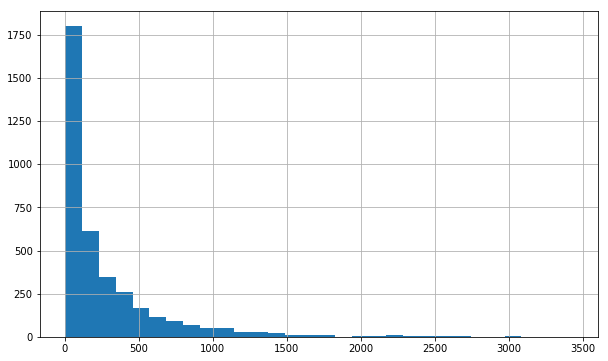

In [234]:
data.groupby('movie_id').size().hist(bins=30)

In [235]:
?pd.Series.hist

In [239]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

active_titles = ratings_by_title.index[ratings_by_title >= 250]
ratings_by_title.loc[ratings_by_title >= 250]

len(active_titles)
active_titles

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

1216

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [241]:
# Select rows on the index
pop_mean_ratings = mean_ratings.loc[active_titles]
pop_mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [243]:
top_female_ratings = pop_mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring Rating Disagreement

In [244]:
pop_mean_ratings['diff'] = pop_mean_ratings['M'] - pop_mean_ratings['F']

In [246]:
sorted_by_diff = pop_mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]
sorted_by_diff[-10:]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [249]:
sorted_by_diff.loc[sorted_by_diff.index.str.contains('godfather', case=False)]

gender,F,M,diff
title,,,
"Godfather: Part III, The (1990)",3.267123,3.363057,0.095934
"Godfather, The (1972)",4.314700,4.583333,0.268634
"Godfather: Part II, The (1974)",4.040936,4.437778,0.396842


In [259]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [260]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [268]:
age_mean_ratings = data.pivot_table('rating', index='title', columns='age', aggfunc='mean')
age_mean_ratings.head()
pop_age_mean_ratings = age_mean_ratings.loc[active_titles]
pop_age_mean_ratings['diff'] = pop_age_mean_ratings[1] - pop_age_mean_ratings[35]
srted = pop_age_mean_ratings.dropna(how='any').sort_values(by='diff')
srted[:10]
srted[-10:]

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.0,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.5,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.5,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.0,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571


age,1,18,25,35,45,50,56,diff
title,,,,,,,,
Rosencrantz and Guildenstern Are Dead (1990),1.0,4.225352,4.017341,3.627907,3.428571,3.923077,4.400000,-2.627907
Eat Drink Man Woman (1994),2.5,4.032258,4.075342,4.044118,4.081081,4.051282,4.391304,-1.544118
Around the World in 80 Days (1956),2.0,3.222222,3.521739,3.500000,3.509804,3.737705,3.947368,-1.500000
Where Eagles Dare (1969),2.5,3.583333,3.941176,3.831169,3.750000,3.744681,3.842105,-1.331169
Fools Rush In (1997),2.0,3.043478,3.056911,3.227273,3.250000,3.714286,4.000000,-1.227273
Three Colors: Red (1994),3.0,4.408163,4.186667,4.171875,4.238095,4.142857,4.428571,-1.171875
Some Folks Call It a Sling Blade (1993),3.0,4.222222,4.294643,4.164179,4.307692,4.137931,4.363636,-1.164179
Beneath the Planet of the Apes (1970),2.0,2.605263,3.086207,3.133333,2.526316,2.666667,3.058824,-1.133333
Cabaret (1972),2.8,3.791667,3.821782,3.922481,3.907895,3.925373,4.195122,-1.122481


age,1,18,25,35,45,50,56,diff
title,,,,,,,,
Shadowlands (1993),5.000000,3.500000,3.837838,3.625000,3.793103,4.000000,4.366667,1.375000
Breaking the Waves (1996),5.000000,3.875000,3.882353,3.617021,3.727273,3.782609,3.750000,1.382979
Billy Madison (1995),3.969697,3.528000,2.912162,2.545455,3.000000,1.500000,3.500000,1.424242
Barbarella (1968),4.333333,2.942857,3.007576,2.842593,3.166667,3.146341,3.315789,1.490741
Night Shift (1982),5.000000,3.277778,3.442029,3.476744,3.521739,3.750000,3.375000,1.523256
Battle for the Planet of the Apes (1973),4.500000,2.964286,2.937500,2.864583,2.354839,2.357143,3.266667,1.635417
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667,1.681818
"Golden Child, The (1986)",4.500000,3.234043,2.864979,2.730769,2.777778,2.538462,2.125000,1.769231
Firestarter (1984),4.750000,3.173077,2.931624,2.939394,2.818182,2.571429,2.666667,1.810606


## <a id='3'>US Baby Names 1880–2010
- <a href='#0'> Back to TOC

In [270]:
!tree -L 2 datasets/babynames/ 

datasets/babynames/
├── NationalReadMe.pdf
├── yob1880.txt
├── yob1881.txt
├── yob1882.txt
├── yob1883.txt
├── yob1884.txt
├── yob1885.txt
├── yob1886.txt
├── yob1887.txt
├── yob1888.txt
├── yob1889.txt
├── yob1890.txt
├── yob1891.txt
├── yob1892.txt
├── yob1893.txt
├── yob1894.txt
├── yob1895.txt
├── yob1896.txt
├── yob1897.txt
├── yob1898.txt
├── yob1899.txt
├── yob1900.txt
├── yob1901.txt
├── yob1902.txt
├── yob1903.txt
├── yob1904.txt
├── yob1905.txt
├── yob1906.txt
├── yob1907.txt
├── yob1908.txt
├── yob1909.txt
├── yob1910.txt
├── yob1911.txt
├── yob1912.txt
├── yob1913.txt
├── yob1914.txt
├── yob1915.txt
├── yob1916.txt
├── yob1917.txt
├── yob1918.txt
├── yob1919.txt
├── yob1920.txt
├── yob1921.txt
├── yob1922.txt
├── yob1923.txt
├── yob1924.txt
├── yob1925.txt
├── yob1926.txt
├── yob1927.txt
├── yob1928.txt
├── yob1929.txt
├── yob1930.txt
├── yob1931.txt
├── yob1932.txt
├── yob1933.txt
├── yob1934.txt
├── yob1935.txt
├── yob1936.txt
├── yob1937.txt
├── yob1938.txt
├── yob1939.t

In [352]:
!wc -l datasets/babynames/*.txt | tail -n5

   34883 datasets/babynames/yob2007.txt
   35006 datasets/babynames/yob2008.txt
   34602 datasets/babynames/yob2009.txt
   33838 datasets/babynames/yob2010.txt
 1690784 total


In [353]:
!grep ',F,' datasets/babynames/yob2010.txt | wc -l

   19698


In [23]:
!head -n 10 datasets/babynames/yob1880.txt

### Plot Total births vs Year

In [274]:
# input and calculate

path = 'datasets/babynames/'
years = np.arange(1880,2010+1)

d = {} # total births vs year
gender_df = {}

for i, year in enumerate(years):
    file = path + 'yob{}.txt'.format(year)
    df = pd.read_csv(file, names=['name', 'sex', 'births'])    

    d[year] = df['births'].sum()
    gender_df[]
    if i%50 == 0:
        print(i)

0
50
100


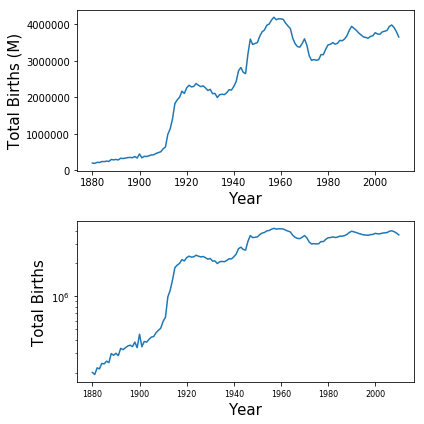

In [345]:
# plotting
#%matplotlib notebook
%matplotlib inline

fig,ax=plt.subplots(2,1, figsize=(6,6))

se = pd.Series(d)

se.plot(ax=ax[0])

# x/y label text, fontsize, rotation
ax[0].set_xlabel('Year',         fontsize=15); 
ax[0].set_ylabel('Total Births (M)', fontsize=15, rotation=90);

# x/y ticklabels text, fontsize, rotation
label = np.arange(0,5000000,1000000)
ax[0].set_yticks(label)
#ax[0].tick_params(axis='y', labelsize=7) # another way to control tick label size

se.plot(ax=ax[1], logy=True);

plt.xticks(fontsize=8)
ax[1].set_xlabel('Year',   fontsize=15); 
ax[1].set_ylabel('Total Births', fontsize=15);

plt.tight_layout();

In [347]:
# input and calculate

path = 'datasets/babynames/'
years = np.arange(1880,2010+1)

d = {'total':[], 'boy':[],'girl':[]} # total births, boys, girls vs year

for i, year in enumerate(years):
    file = path + 'yob{}.txt'.format(year)
    df = pd.read_csv(file, names=['name', 'sex', 'births'])    

    d['total'].append(df['births'].sum())
    d['boy'].append(  df.loc[df.sex=='M']['births'].sum())
    d['girl'].append( df.loc[df.sex=='F']['births'].sum())
    
    if i%50 == 0:
        print(i)

0
50
100


,total,boy,girl
0,201486,110493,90993
1,192703,100748,91955
2,221538,113687,107851
3,216954,104632,112322
4,243466,114445,129021


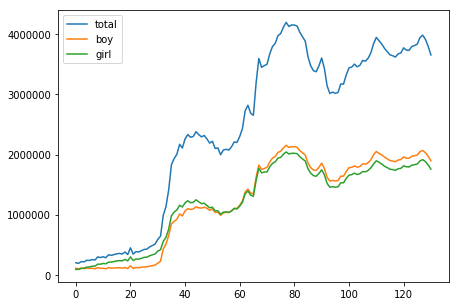

In [351]:
# plotting
#%matplotlib notebook
%matplotlib inline

df=pd.DataFrame(d)

df.plot(figsize=(7,5))

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
total    5 non-null int64
boy      5 non-null int64
girl     5 non-null int64
dtypes: int64(3)
memory usage: 200.0 bytes


In [38]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [39]:
names1880.births.sum()

201486

In [26]:
def top(df, n, cols):
    return df[cols][:n]

names1880.groupby('sex').size()
names1880.groupby('sex').apply(top, n=5, cols=['name','births'])
#names1880.groupby('sex').apply(lambda df: df[['name','births']][:5])

sex
F     942
M    1058
dtype: int64

name  births
sex                       
F   0         Mary    7065
    1         Anna    2604
    2         Emma    2003
    3    Elizabeth    1939
    4       Minnie    1746
M   942       John    9655
    943    William    9533
    944      James    5927
    945    Charles    5348
    946     George    5126

In [ ]:
names1880.groupby('sex').births.sum()

In [ ]:
# read all files into DF

years = range(1880, 2011)

pieces = []
col_names = ['name', 'sex', 'bircol_namesths']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=col_names)

    frame['year'] = year
    pieces.append(frame)

# Concatenate list of DFs into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names

In [ ]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names

In [ ]:
names.groupby(['year', 'sex']).prop.sum()

In [ ]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [ ]:
top1000

### Analyzing Naming Trends

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [ ]:
total_births.info()
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [ ]:
plt.figure()

In [ ]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
df

In [ ]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [ ]:
fig = plt.figure()

In [ ]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

#### The “last letter” revolution

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
fig = plt.figure()

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
fig = plt.figure()

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## USDA Food Database

{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}

In [ ]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

In [ ]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

In [ ]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

In [ ]:
pd.value_counts(info.group)[:10]

In [ ]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [ ]:
nutrients

In [ ]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [ ]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

In [ ]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.iloc[30000]

In [ ]:
fig = plt.figure()

In [ ]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [ ]:
max_foods.loc['Amino Acids']['food']

## 2012 Federal Election Commission Database

In [127]:
!wc -l datasets/fec/P00000001-ALL.csv

 1001732 datasets/fec/P00000001-ALL.csv


In [145]:
N = 1001732

skip_ns = [ i for i in range(N) if i%1000 !=0 ]
skip_ns = set(range(N)) - set(range(N)[::1000])

In [146]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv', skiprows=skip_ns)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
cmte_id              1001 non-null object
cand_id              1001 non-null object
cand_nm              1001 non-null object
contbr_nm            1001 non-null object
contbr_city          1001 non-null object
contbr_st            1000 non-null object
contbr_zip           1001 non-null object
contbr_employer      983 non-null object
contbr_occupation    988 non-null object
contb_receipt_amt    1001 non-null float64
contb_receipt_dt     1001 non-null object
receipt_desc         20 non-null object
memo_cd              89 non-null object
memo_text            95 non-null object
form_tp              1001 non-null object
file_num             1001 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 125.2+ KB


In [ ]:
fec.iloc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

In [ ]:
plt.figure()

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing Donation Amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
plt.figure()

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

## Conclusion